In [30]:
import xgboost as xgb
from xgboost import XGBClassifier
import pandas as pd
import sklearn
import numpy as np


In [42]:
data = pd.read_csv("/Users/linaelkjaerpedersen/Desktop/Datascience/Exam/R-code/full_df.csv")

print(data)

data = data[ ['id'] + [ col for col in data.columns if col != 'id' ] ]

data.rename({"Unnamed: 0":"a"}, axis="columns", inplace=True)

# Then, drop the column as usual.
data.drop(["a"], axis=1, inplace=True)

data

       Unnamed: 0  gender   age  hypertension  heart_disease  smoking_history  \
0               1       0  80.0             0              1                0   
1               2       0  54.0             0              0                5   
2               3       1  28.0             0              0                0   
3               4       0  36.0             0              0                1   
4               5       1  76.0             1              1                1   
...           ...     ...   ...           ...            ...              ...   
99977       99978       0  80.0             0              0                5   
99978       99979       0   2.0             0              0                5   
99979       99980       1  66.0             0              0                3   
99980       99981       0  24.0             0              0                0   
99981       99982       0  57.0             0              0                1   

         bmi  HbA1c_level  

,id,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,1,0,80.0,0,1,0,25.19,6.6,140,0
1,2,0,54.0,0,0,5,27.32,6.6,80,0
2,3,1,28.0,0,0,0,27.32,5.7,158,0
3,4,0,36.0,0,0,1,23.45,5.0,155,0
4,5,1,76.0,1,1,1,20.14,4.8,155,0
...,...,...,...,...,...,...,...,...,...,...
99977,99978,0,80.0,0,0,5,27.32,6.2,90,0
99978,99979,0,2.0,0,0,5,17.37,6.5,100,0
99979,99980,1,66.0,0,0,3,27.83,5.7,155,0
99980,99981,0,24.0,0,0,0,35.42,4.0,100,0


In [43]:
X = data.iloc[:,1:-1].values
y = data.iloc[:,-1].values

print(X)
y


[[  0.    80.     0.   ...  25.19   6.6  140.  ]
 [  0.    54.     0.   ...  27.32   6.6   80.  ]
 [  1.    28.     0.   ...  27.32   5.7  158.  ]
 ...
 [  1.    66.     0.   ...  27.83   5.7  155.  ]
 [  0.    24.     0.   ...  35.42   4.   100.  ]
 [  0.    57.     0.   ...  22.43   6.6   90.  ]]


array([0, 0, 0, ..., 0, 0, 0])

In [46]:
#Splitting into test and train set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.80)

# create model instance
bst = XGBClassifier(n_estimators=2, max_depth=2, learning_rate=1, objective='binary:logistic')
# fit model
bst.fit(X_train, y_train)
# make predictions
preds = bst.predict(X_test)

correct = 0
false = 0

for i in range(len(preds)):
    if preds[i] == y_test[i]:
        correct += 1
    else: 
        false += 1


print(correct)
print(false)





77728
2258


In [37]:
#print(np.unique(y_test))
#print(np.unique(preds))

X_train

array([[1, 19.0, 0, ..., 6.5, 158, 0],
       [0, 35.0, 0, ..., 3.5, 159, 0],
       [1, 2.0, 0, ..., 4.8, 80, 0],
       ...,
       [0, 73.0, 1, ..., 3.5, 145, 0],
       [0, 80.0, 0, ..., 6.0, 200, 0],
       [1, 80.0, 0, ..., 4.8, 140, 0]], dtype=object)

<AxesSubplot: title={'center': 'Feature importance'}, xlabel='F score', ylabel='Features'>

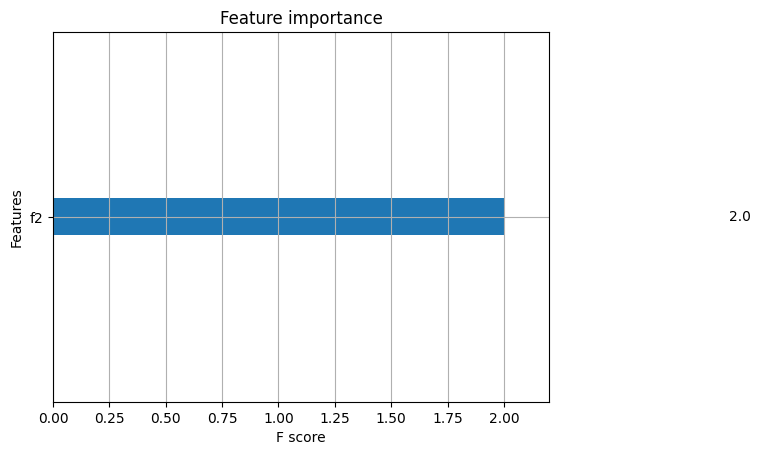

In [23]:
xgb.plot_importance(bst)